Cette première cellule vous présente la manière avec laquelle j'ai obtenu les features/caractéristiques à partir des jeux de données de "textes"
Pour obtenir les textes (et les "filtrer") j'ai utiliser le script ./textDatasets/conversion.sh (qui prends, par exemple les fichiers FR_* les concatene, supprime les accents (en gardant les caracteres sans accents) et enfin transforme en minuscules).
J'ai utilisé les livres "open data" de la base du site Guttenberg Project (qui archive énormément de livres en texte, "txt" simples", tombés dans le domaine publique).

In [1]:
import numpy as np
import string
BlockSz=100


# On procede de la même façon pour les differents languages
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/textDatasets/textDatasets/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE =[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz:(index+1)*BlockSz])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textFRENCH = open('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/textDatasets/textDatasets/FRENCH')
FR=textFRENCH.read()
textFRENCH.close()
NbBlock=int(np.floor(len(FR)/BlockSz))
DataFR=[]
FeaFR =[]
for index in range(NbBlock):
    DataFR.append(FR[index*BlockSz:(index+1)*BlockSz])
    countFR=[]
    for letter in string.ascii_lowercase:
        countFR.append(DataFR[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countFR.append(DataFR[index].count(letter1+letter2))
    FeaFR.append(countFR)

# On procede de la même façon pour les differents languages ....
textSPANISH = open('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/textDatasets/textDatasets/SPANISH')
ES=textSPANISH.read()
textSPANISH.close()
NbBlock=int(np.floor(len(ES)/BlockSz))
DataES=[]
FeaES =[]
for index in range(NbBlock):
    DataES.append(ES[index*BlockSz:(index+1)*BlockSz])
    countES=[]
    for letter in string.ascii_lowercase:
        countES.append(DataES[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countES.append(DataES[index].count(letter1+letter2))
    FeaES.append(countES)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/textDatasets/textDatasets/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz:(index+1)*BlockSz])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [2]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....
np.save('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaEN.npy', FeaEN)
np.save('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaFR.npy', FeaFR)
np.save('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaDE.npy', FeaDE)
np.save('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaES.npy', FeaES)

In [3]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
FeaEN = np.load('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaEN.npy')
FeaFR = np.load('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaFR.npy')
FeaDE = np.load('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaDE.npy')
FeaES = np.load('/Users/leott_000/Desktop/Cours 2020/UTT/Cours/ML avancé/Project Tuan/FeaES.npy')

In [4]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaFR = np.array(FeaFR)
print(FeaFR.shape)

FeaES = np.array(FeaES)
print(FeaES.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(43292, 702)
(41160, 702)
(43218, 702)
(42095, 702)


In [33]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time
from sklearn import metrics
from sklearn import svm



## Questions:
* 1) Réaliser une classification binaire en utilisant les méthodes linéaires suivantes: regression "ridge", LASSO et SVM (sans noyau !).
 * Pour ces méthodes vous devez faire une recherche du meilleur paramètre de régularisation ;
 * Vous devrez égalemement selectionner les deux languages de votre choix
 * Dans l'exemple fourni la taille des block de caractère extraits 

### Etape 1 - Préparation les données:
Pour réaliser une classifcation binaire, nous utiliserons la langue Francais et la langue Allemagne. Le premier étape est de construire en dataset qui regroupe les deux langues. Ensuite, nous avons créé une variable expliqué y qui est 1 pour tous les texts en langues francais et -1 pour les textes en allemagne. Donc le dataset de deux langue francais et anglais contient 84 452 observations et 702 variables expliquatives et une variables à expliquer (y).

Pour rappel, la taille de BlockSZ = 100


In [34]:
#Créer le dataframe
df_Fr = pd.DataFrame(FeaFR)
df_Fr.head(10)
df_De = pd.DataFrame(FeaDE)

In [35]:
#Créer le variable expliquée.
df_Fr['y'] = 1
#df_Fr.head(10)
df_De['y'] = -1
#df_De.head(10)

In [36]:
df_Fr.reset_index(drop=True, inplace=True)
df_De.reset_index(drop=True, inplace=True)

In [37]:
#Fusionner les deux dataframe
df_final = pd.concat([df_Fr, df_De],axis= 0,sort=False)
df_final.reset_index(drop=True, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84452 entries, 0 to 84451
Columns: 703 entries, 0 to y
dtypes: int32(702), int64(1)
memory usage: 226.8 MB


In [38]:
#Mélanger les données dans la base de données
df_final1 = df_final.sample(frac = 0.7)
df_final1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,y
7017,10,2,2,7,16,3,3,0,6,0,...,0,0,0,0,0,0,0,0,0,1
2229,7,0,2,2,21,0,1,0,7,0,...,0,0,0,0,0,0,0,0,0,1
60797,6,1,5,4,16,2,5,6,9,0,...,0,0,0,1,0,0,0,0,0,-1
38400,12,1,2,6,14,0,3,1,10,0,...,0,0,0,0,0,0,0,0,0,1
67600,5,2,6,6,17,1,0,5,8,1,...,0,0,0,0,0,0,0,0,0,-1


In [39]:
#Définir les variables expliquatives (X)
features = df_final1.iloc[:, 0:702]
features.reset_index(drop= True, inplace=True)

In [40]:
features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
0,10,2,2,7,16,3,3,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,2,2,21,0,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,5,4,16,2,5,6,9,0,...,0,0,0,0,1,0,0,0,0,0
3,12,1,2,6,14,0,3,1,10,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,6,6,17,1,0,5,8,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Renommer la variable y comme la variable target!  
target = df_final1['y']
target.reset_index(drop=True, inplace=True)


### Créer les modèles pour la classification:
Dans cette étape, nous construisons 3 modèles différents:
 - Régressions Ridge, Lasso, SVM sans noyau
 - Pour chaque modèle, par exemple pour la régression Ridge, nous commencons par une modèle de base (les hyperparametres sont fixé par défaut) ensuite pour trouver les meilleurs parametres, la fonction GridsearchSV automatise la recherche d'un optimum parmi les hyper-paramèrtres, elle utilise notament la validation croisée.
 - Et à la fin, nous construisons le modèle classification avec les meilleurs paramètres retrouvé par la fonction GridSearchCv.
 
 

In [43]:
# Créer les traint, test datasets 
from sklearn.model_selection import train_test_split
# créer un nouveau train, test avec un taux de 30% 
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = .30, random_state = 0)

In [44]:
# Construire le modèle Ridge avec les parametres au défault
import time
start_time = time.time()
#X_train_scaled = StandardScaler().fit_transform(X_train)
clf_1 = linear_model.Ridge()
clf_1.fit(X_train, y_train)
clf_1.score(X_train, y_train)

0.9542825285125471

Ici, le score(X_train, y_train) = 95% mesure la précision du modèle pour les données d'entraînement  


In [45]:
clf_1.score(X_test, y_test)

0.9511632494276174

In [131]:
#Cross-validation avec GridSearchcv

import time
start_time = time.time()

#sklearn.metrics.SCORERS.keys()
params={'alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 1, 10]}
model = linear_model.Ridge()
clf_ridge = GridSearchCV(model, params,cv=10,verbose = 2,n_jobs=-1, scoring = 'r2')
clf_ridge.fit(X_train,y_train)

print("\n--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 7 candidates, totalling 70 fits

--- 33.407318353652954 seconds ---


Avec la fonction gridsearch, le base train est divisé en 10 parties  pour faire la validation croisée. Il s'entraine sur n-1 (9) parties et tester une dernières parties. Pour chaque valeur pour les hyper parametres, l'algorithme sera réentrainé pour n fois pour avoir la performance de chaques parties. Ensuite, il calcul la perfomance en moyen pour tous les parties et c'est la performances obtenue à la fin pour cette valeur hyper-parametres. Ici, on trouve que avec alpha = 10, on a un meilleur hyper-paramètre.

In [47]:
print(clf_ridge.best_params_)
pd.DataFrame(clf_ridge.cv_results_)


{'alpha': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,9.180282,2.629668,0.123386,0.037059,0.01,{'alpha': 0.01},0.951739,0.948811,0.953303,0.950105,0.947550,0.953219,0.953458,0.954107,0.958232,0.951246,0.952177,0.002872,7
1,3.561515,0.509194,0.054138,0.016051,0.10,{'alpha': 0.1},0.951751,0.948835,0.953335,0.950121,0.947565,0.953288,0.953466,0.954125,0.958233,0.951251,0.952197,0.002871,6
2,2.976949,0.068910,0.061894,0.013450,0.20,{'alpha': 0.2},0.951762,0.948855,0.953364,0.950137,0.947579,0.953340,0.953473,0.954142,0.958235,0.951256,0.952214,0.002869,5
3,2.891991,0.067256,0.053237,0.008742,0.30,{'alpha': 0.3},0.951772,0.948872,0.953389,0.950152,0.947592,0.953377,0.953479,0.954157,0.958237,0.951261,0.952229,0.002868,4
4,2.832748,0.168427,0.054988,0.006109,0.50,{'alpha': 0.5},0.951788,0.948897,0.953429,0.950180,0.947613,0.953426,0.953490,0.954183,0.958241,0.951270,0.952252,0.002866,3
5,3.018079,0.277455,0.056991,0.006236,1,{'alpha': 1},0.951815,0.948935,0.953496,0.950235,0.947651,0.953492,0.953511,0.954230,0.958252,0.951288,0.952291,0.002862,2
6,2.619546,0.166297,0.045182,0.012129,10,{'alpha': 10},0.951909,0.949070,0.953630,0.950537,0.947825,0.953746,0.953633,0.954426,0.958364,0.951442,0.952458,0.002848,1


In [132]:
#Construire le meilleur modèle (avec alpha = 10)
OptRidge_model = clf_ridge.best_estimator_
OptRidge_model.fit(X_train,y_train)
OptRidge_model.score(X_train,y_train)

0.9541883641710215

In [133]:
OptRidge_model.score(X_test,y_test)

0.9512865984237674

In [134]:
y_predict_1 = OptRidge_model.predict(X_test)

In [135]:
#transformer les outcomes (y_predict_1) en binaire
for i in range(len(y_predict_1)):
    if(y_predict_1[i]>0):
        y_predict_1[i] = 1
    else:
        y_predict_1[i] = -1

In [52]:
cm = confusion_matrix(y_test, y_predict_1)
print(cm)

[[8997   64]
 [   1 8673]]


Ensuite pour faire une classification avec la régression Ridge, on regroupé tous les valeurs qui sont au moins ou égale 0 dans une class (-1) et l'autres données qui sont plus de 0 dans une autre class (1). Avec la matrice de confusion, on trouve qu'il y a 8997 données qui ont trouvé en vrai positif c'est à dire ce sont des données placé ou le modèle prédit correctement la class positive. De l'autre facon, il y a 8673 données sont placé en vrai négatif qui signifie que la prédiction est correct mais la classe est négative. 

In [53]:
cl = classification_report(y_test, y_predict_1)
print(cl)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9061
           1       0.99      1.00      1.00      8674

    accuracy                           1.00     17735
   macro avg       1.00      1.00      1.00     17735
weighted avg       1.00      1.00      1.00     17735



### Modèle Lasso

Le model lasso et le modele Ridge sont les deux méthode pour la régularization. Ils sont utilisé dans ce projet car nous avons une base de données avec beaucoup de dimension (703 colums). La différence du modèle Lasso avec le Ridge est que le Lasso utilise la L1 penalties (L2 pour Ridge). Les étapes pour trouver le meilleur parametres et le meilleur modèle est la même avec le modèle Ridge comme on a fait au dessus.

In [103]:
#Modele Lasso avec parametre automatisé (au défault)
import time
start_time = time.time()

clf_2 = linear_model.Lasso()
clf_2.fit(X_train, y_train)
#Temps de calcul
print("\n--- %s seconds ---" % (time.time() - start_time))


--- 3.6205480098724365 seconds ---


In [104]:
clf_2.score(X_train, y_train)

0.5159838742213312

In [105]:
clf_2.score(X_test, y_test)

0.5130326805250452

On voit ici que, avec le parametre choisir par défaut, la prédiction du modèle Lasso est beaucoup moins par rapport le modèle Ridge. Donc, pour optimiser la perfomance du modele Lasso on utilise la cross validation avec GridSearCv pour trouver le meilleur modèle et le meilleur hyper parametre.

In [106]:
#Cross Validation avec GridSearchCV
start_time = time.time()


#sklearn.metrics.SCORERS.keys()
params={'alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 1, 10]}
model = linear_model.Lasso()
clf = GridSearchCV(model, params,cv=10,verbose = 1, scoring = 'r2',n_jobs=-1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

#Calculer le temps pour la prédiction du modèle
print("\n--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 7 candidates, totalling 70 fits

--- 74.98473238945007 seconds ---


In [58]:
# Alpha = 0.01 est le meilleur hyper parametre.
print(clf.best_params_)
pd.DataFrame(clf.cv_results_)

{'alpha': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,14.959550,1.117113,0.061293,0.015104,0.01,{'alpha': 0.01},0.939318,0.935599,0.940102,0.935356,0.932729,0.940468,9.403871e-01,0.940546,0.943864,0.939959,0.938833,0.003103,1
1,6.556974,0.162231,0.056441,0.008933,0.10,{'alpha': 0.1},0.886445,0.882360,0.888717,0.881740,0.877032,0.883775,8.867764e-01,0.884384,0.890465,0.886909,0.884860,0.003679,2
2,5.147680,0.171073,0.064495,0.012326,0.20,{'alpha': 0.2},0.827769,0.825713,0.832606,0.824040,0.819213,0.826612,8.292651e-01,0.827369,0.835023,0.829325,0.827693,0.004165,3
3,4.388294,0.256322,0.063595,0.007067,0.30,{'alpha': 0.3},0.778048,0.777791,0.785640,0.775210,0.771758,0.778660,7.808635e-01,0.779866,0.788115,0.780890,0.779684,0.004467,4
4,3.870679,0.045375,0.062044,0.007071,0.50,{'alpha': 0.5},0.690395,0.691858,0.701056,0.687696,0.688913,0.694862,6.944274e-01,0.692128,0.701993,0.693431,0.693676,0.004479,5
5,3.693654,0.226579,0.061193,0.006875,1,{'alpha': 1},0.513579,0.515438,0.523162,0.512464,0.513982,0.516375,5.152771e-01,0.511656,0.522784,0.513861,0.515858,0.003794,6
6,3.088751,0.177704,0.046233,0.015460,10,{'alpha': 10},-0.000284,-0.000073,-0.000007,-0.001224,-0.000117,-0.000393,-6.363484e-09,-0.000034,-0.000011,-0.000019,-0.000216,0.000359,7


In [107]:
#Construire le modèle avec le meilleur hyper paramètre!
OptLasso_model = clf.best_estimator_
OptLasso_model.fit(X_train,y_train)
OptLasso_model.score(X_train,y_train)

0.9390513860612

In [108]:
OptLasso_model.score(X_test,y_test)

0.9374335671423654

Avec alpha = 10, la performance du modèle a augmenté jusqu'à 93% par rapport à 51% comme avant!

In [109]:

y_pred_2 = OptLasso_model.predict(X_test)

In [110]:
# Classer les outputs en deux groupe:
for i in range(len(y_pred_2)):
    if(y_pred_2[i]>0):
        y_pred_2[i] = 1
    else:
        y_pred_2[i] = -1

In [111]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred_2)
print(cm)

[[8987   74]
 [   1 8673]]


In [65]:
#Générer les principales scores pour évaluer le modèle Lasso:
cl = classification_report(y_test, y_pred_2)
print(cl)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9061
           1       0.99      1.00      1.00      8674

    accuracy                           1.00     17735
   macro avg       1.00      1.00      1.00     17735
weighted avg       1.00      1.00      1.00     17735



In [66]:
acc = metrics.accuracy_score(y_test, y_pred_2)
print(acc)


0.9957710741471666


Avec un accuracy = 99,5% c'est à dire que le 99.5% les (prédictions) sont classé exactment commes les variables expliqué (target) dans la base test.

### SVM Sans Noyau
L'idée principale de cette méthode de classification est que les SVM linéaires cherchent le séparateur (l’hyperplan de séparation) qui maximise la marge pour classer les données en deux groupes (positives = 1, négative = -1). En raison que le modèle SVM prendre beaucoup de temps pour le calcul, nous ne pouvons pas placer plusiers hyper-parametres pour tester. 

In [67]:
#Cross Validation avec GridsearchCv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#sklearn.metrics.SCORERS.keys()
param_grid = {'C': [0.1,1, 2], 'gamma': [0.1,0.01], 'kernel': ['linear']}
#cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
model = svm.SVC(cache_size=8000)
clf = GridSearchCV(model,param_grid,cv=3,verbose = 1,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train,y_train)

print(clf.best_params_)
pd.DataFrame(clf.cv_results_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,256.511021,29.543547,11.085984,1.421846,0.1,0.10,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.996738,0.996375,0.997607,0.996907,0.000517,1
1,269.769373,37.958743,12.582206,2.401187,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.996738,0.996375,0.997607,0.996907,0.000517,1
2,1012.948360,199.352371,13.672808,2.216743,1,0.10,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.995360,0.994490,0.994635,0.994829,0.000381,3
3,1012.344333,227.691273,11.852858,2.736202,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.995360,0.994490,0.994635,0.994829,0.000381,3
4,1286.761158,101.467353,5.861030,1.528119,2,0.10,linear,"{'C': 2, 'gamma': 0.1, 'kernel': 'linear'}",0.994490,0.992750,0.993837,0.993693,0.000718,5
5,903.779103,131.773866,5.675078,1.256623,2,0.01,linear,"{'C': 2, 'gamma': 0.01, 'kernel': 'linear'}",0.994490,0.992750,0.993837,0.993693,0.000718,5


In [ ]:
# On trouve qu'avec un C = 0.1 , gamma = 0.1, ce sont les meilleurs hyper-parametres du modèle SVM Lineaire!

In [68]:
#Trouver le meilleur estimateur du modele SVM Linéaire ( score = 99.6% plus grand que les deux models avants)
OptSVML_model = clf.best_estimator_
OptSVML_model.fit(X_train,y_train)
OptSVML_model.score(X_test, y_test)

0.9968424020298844

In [69]:
y_pred_3 = OptSVML_model.predict(X_test)

In [70]:
y_pred_3

array([-1, -1, -1, ...,  1, -1, -1], dtype=int64)

In [72]:
#Principales scores pour évaluer le modèle SVM lineaire!
cl = classification_report(y_test, y_pred_3)
print(cl)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9061
           1       0.99      1.00      1.00      8674

    accuracy                           1.00     17735
   macro avg       1.00      1.00      1.00     17735
weighted avg       1.00      1.00      1.00     17735



In [73]:
#Matrice de confusion du modèle SVM linéaire
cm = confusion_matrix(y_test, y_pred_3)
print(cm)

[[9009   52]
 [   4 8670]]


In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Questions:
* 2) Réaliser une classification binaire avec l'une des méthodes linéaire précédent en utilisant la réduction de dimension (ACP par exemple, ou une autre méthode)


L'objectif de l'ACP est de réduire le nombre de dimensions (dans ce cas nous avons plus de 700 dimension différents) en le projetant sur un sous-espace à k dimensions où k <d. La méthode l'ACP suit les étapes suivants:

1) Standardisez les données. 
2) Utilisez les données standardisées pour générer une matrice de covariance (ou effectuer une décomposition vectorielle singulière). 
3) Obtenir des vecteurs propres (composantes principales) et des valeurs propres à partir de la matrice de covariance. Donc, chaque vecteur propre aura une valeur propre correspondante. Triez les valeurs propres par ordre décroissant. 
4) Sélectionnez les k vecteurs propres avec les valeurs propres les plus grandes, où k est le nombre de dimensions utilisées dans le nouvel espace d'entités (k≤d). Construisez une nouvelle matrice avec les k vecteurs propres sélectionnés.

Pour la suite, on va appliquer une des méthodes de classification utilisé dans la question 1 avec les k dimensions trouvés grace à l'ACP pour faire la prédiction.

In [80]:

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
import seaborn

In [82]:
# 1) Normalisé les données dans la base train et la base test
X_std = StandardScaler().fit_transform(X_train)
X_std_test =StandardScaler().fit_transform(X_test)

In [76]:
X_std

array([[-0.05392497, -1.14795437, -1.24010967, ...,  0.        ,
        -0.02027277, -0.05425844],
       [ 0.29726625, -1.14795437, -0.64830025, ...,  0.        ,
        -0.02027277, -0.05425844],
       [ 0.99964868,  1.18190486, -1.24010967, ...,  0.        ,
        -0.02027277, -0.05425844],
       ...,
       [-1.45868983, -1.14795437,  1.127128  , ...,  0.        ,
        -0.02027277, -0.05425844],
       [-0.7563074 ,  0.40528512, -0.64830025, ...,  0.        ,
        -0.02027277, -0.05425844],
       [-0.40511618, -0.37133463, -1.24010967, ...,  0.        ,
        -0.02027277, -0.05425844]])

In [77]:
# 2) Construire la matrice de covariance et trouver les valeurs propres et les vecteurs propres!
cov_mat = np.cov(X_std.T)
#print('Matrice de la covariance: \n%s' %np.cov(X_std.T))
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [81]:
#Redimensionner les données dans la base train
pca = PCA()
pca.fit_transform(X_std)
#print(pca.explained_variance_ratio_) 

array([[-7.78825421e+00,  1.20983077e+00,  2.24686627e+00, ...,
         2.29662992e-16, -6.62107594e-17,  2.73169900e-17],
       [ 4.55418004e+00, -1.17132601e+00,  2.40289337e-01, ...,
         1.44104426e-16,  9.26071106e-17,  4.35276988e-17],
       [ 4.01198142e+00, -1.87749032e+00,  2.43196498e+00, ...,
         1.28834466e-16, -9.36480289e-17,  9.61419712e-17],
       ...,
       [ 5.03233673e+00,  1.46985557e+00, -1.94406770e+00, ...,
         1.79460113e-18, -8.13543751e-18,  3.11523922e-18],
       [ 6.13098011e+00, -2.44052622e+00, -2.67543293e+00, ...,
        -1.76355890e-17, -5.29714005e-18, -2.59463588e-19],
       [ 6.17870523e+00, -3.26320724e+00,  4.05639725e+00, ...,
         1.08458012e-17, -6.20906457e-18, -1.78579411e-18]])

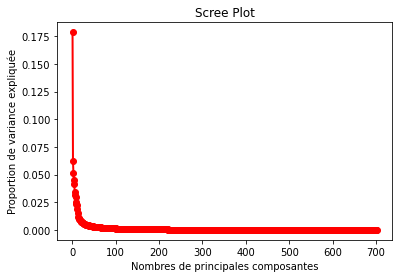

In [59]:
#Crée une Scree plot pour trouver le meilleur k (ici on voit que les deux premiers k sont les dimensions le plus importants)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Nombres de principales composantes')
plt.ylabel('Proportion de variance expliquée')
plt.show()

In [83]:
#Etape 2 : Appliquer le modèle Ridge avec les 2 premiers dimensions trouvés avec l'ACP
pca = PCA(n_components=2)
Xreg_train_pca = pca.fit_transform(X_std)
Xreg_test_pca = pca.fit_transform(X_std_test)

In [84]:
from sklearn.linear_model import Ridge

In [90]:
model_pca = linear_model.Ridge(alpha = 10)
model_pca.fit(Xreg_train_pca, y_train)
model_pca.score(Xreg_train_pca, y_train)


0.9300635084066882

In [91]:
y_pred_pca = model_pca.predict(Xreg_test_pca)

In [94]:
#Transformer les outputs en binaire:
for i in range(len(y_pred_pca)):
    if(y_pred_pca[i]>0):
        y_pred_pca[i] = 1
    else:
        y_pred_pca[i] = -1

In [ ]:
model_pca.score(Xreg_test_pca, y_test)

In [95]:
cl = classification_report(y_test, y_pred_pca)
print(cl)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9061
           1       0.99      1.00      1.00      8674

    accuracy                           1.00     17735
   macro avg       1.00      1.00      1.00     17735
weighted avg       1.00      1.00      1.00     17735



In [96]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)

[[8985   76]
 [   0 8674]]


In [97]:
#Calculer le taux de justement (accuracy) pour les y predict et les y_test
acc = metrics.accuracy_score(y_test, y_pred_pca)
print(acc)

0.9957146884691288


## Questions:
* 3) Modifier la taille des données extraites (BlockSz) afin de trouver une taille à partir de la quelle un taux d'erreur de l'ordre de 10% est observée
 * Avec cette taille de block comparer les méthodes de classification précédentes (avec et sans réduction de dimentionalité)

Le fait de changer la taille des données extraites peuvent avoir une influence sur le taux d'erreur parce que si la taille des données est augmenté, cela fait augmente aussi les erreurs pour la prédiction du modèle machine learning et à l'inverse.  


Avec un taux d'erreur de l'ordre de 10% est calculé par la différent de 1 - taux accuracy selon la formule suivant:
                    "err_test = 1 - np.sum(clf.predict(X_test)==y_test).astype(float)/n_test"

Donc pour trouver la nombre de blocs nécessaires, il faut que nous trouvons la taille des données qui correspond à un taux d'erreur de 10%. Pour cela, on peut commercer tout d'abord en cherchant la nouvelle taille des données pour le test dataset.

Noté que ici, nous utilisons le modèle régression Lasso pour trouver le nombre BlockSz (Si nous utiliserons un autre modèle, la taille du blockSZ peut changer aussi car chaque model donne un taux accuracy différents).  

In [114]:
import numpy as np
np.sum(y_pred_2 == y_test).astype(float)

17660.0

In [118]:
n_test = np.sum(np.sum(y_pred_2 == y_test)).astype(float) /(1 - 0.1)
print(n_test)

19622.222222222223


In [119]:
N_total = n_test/0.3
print(N_total)

65407.40740740741


Avec BlockSz = 100, on a 84452 observations dans la Dataset qui contient la langue francais et la langue Allemagne. Donc avec N_total observations on doit trouver un nombre de BlocSz égale:

BlockSz = N_total*100/84452 

In [120]:
BlockSz = (N_total*100)/84452
print(BlockSz)

77.44921068465804


Pour conclure, avec un BlocSz = 77 on peut avoir un taux d'erreur = 10% en utilisant le modèle régression lasso 

## Questions:
* 4. Réaliser une classification binaire en utilisant les SVM à noyau (comparer les performances obtenus avec un noyau Gaussien (rbf) et un noyau polynomial)

In [121]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()
from numpy import arange
import pandas as pd  

In [122]:
#Modele SVM gaussien (kernel = 'rbf')
classifier = svm.SVC(kernel ='rbf', gamma= 'auto', C =0.01)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [123]:
#Score pour la base Train
classifier.score(X_train, y_train)

0.9963993136946908

In [138]:
#Matrice de confusion pour le modèle 
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[8984   77]
 [   1 8673]]


In [124]:
#Evaluation le modele

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9061
           1       0.99      1.00      1.00      8674

    accuracy                           1.00     17735
   macro avg       1.00      1.00      1.00     17735
weighted avg       1.00      1.00      1.00     17735



In [125]:
#Modèle SVM nonlinear avec kernel = poly
classifier_2 = svm.SVC(kernel ='poly', gamma= 0.001, C = 0.01)
classifier_2.fit(X_train, y_train)


SVC(C=0.01, gamma=0.001, kernel='poly')

Ici, on a choisi le meilleur hyper parametres qu'on a testé avec GridSearchCv en dessous pour éviter la perte de temps de calcul ( vu que le modele prendre beaucoup de temps pour calculer). Pour noter, si le C est grande, l'optimisation choisira un hyperplan à plus faible marge si cet hyperplan réussit mieux à classer correctement tous les points d'apprentissage et au contraire si le C est petite, l'optimisation recherche un hyperplan de séparation à marge plus grande, même si cet hyperplan classe de manière erronée plus de points

In [126]:
#Predicte le modèle pour X_train, y_train
classifier_2.score(X_train, y_train)

0.9964959764142964

In [127]:
y_predict_4 = classifier_2.predict(X_test)

In [128]:
#Critères pour évaluer le modèle SVM rbf
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_4))

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9061
           1       0.99      1.00      1.00      8674

    accuracy                           1.00     17735
   macro avg       1.00      1.00      1.00     17735
weighted avg       1.00      1.00      1.00     17735



In [139]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_predict_4)
print(cm)

[[8989   72]
 [   2 8672]]


In [26]:
#Cross validation pour trouver les meilleurs hyper-parametres du modele SVM non lineaire!
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import time
start_time = time.time()
from numpy import arange
import pandas as pd    
pd.options.display.max_columns = 60

model = SVC(cache_size=8000)

params= {'C': [0.0001, 0.01], 'gamma': [0.001, 0.0001], 'kernel': ['poly', 'rbf']}

scoring ='accuracy'
cv= 3
clf = GridSearchCV(estimator=model,param_grid=params, scoring=scoring , cv=cv, n_jobs=-1)

clf.fit(X_train, y_train)

print(clf.best_params_)

#print(pd.DataFrame(clf.cv_results_))

{'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0    1855.345523      0.882100       746.146791        1.655853  0.0001   
1    1863.444664     37.186680      1641.277087      297.219164  0.0001   
2    1778.222482      0.726672       735.132133       54.295254  0.0001   
3    1932.448743     62.776949      1420.107595       51.763975  0.0001   
4     290.197003      3.827637       119.729544        4.583247  0.0100   
5     429.519816     15.290991       308.849817        4.931068  0.0100   
6    1741.040676     44.016377       611.254488       35.658941  0.0100   
7    1040.010657    146.194505       645.800941      126.622465  0.0100   

  param_gamma param_kernel                                            params  \
0      0.0010         poly   {'C': 0.0001, 'gamma': 0.001, 'kernel': 'poly'}   
1      0.0010          rbf    {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}   
2      0.0001         poly  {'C': 0.00

Après lancer la cross validation avec les différents valeurs pour les hyper-parametre, on trouve qu'avec C = 0.01 et gamma = 0.001 et le noyau polynomial, le modèle donne le meilleur résultat. Par contre le temps de calculer avec le méthode SVM nonlineaire (rbf et polynomial) sont plus longue par rapport les 3 autres modèles dans la 1er question.
On doit choisi les valeurs pour C et gamma plus faibles pour avoir un résultat sortir. Si non, on doit réduire les données dans la base X_train, y_train pour réduire le temps de calcul mais vu que cette méthode peut produire les biais d'estimation donc on n'utilise pas cette techniques

## Questions:
* 5. Sur la base des résultats précédents, quelle est la méthode linéaire la plus adaptée à ce problème de classification


Afin de chosir la méthode linéaire la plus adaptée pour la classification des texte nous pouvons se baser sur les critès commes le scores sortir pour chaque modèles, le taux accuracy, le score précision, recall ou f1 trouvés dans la matrice de confusion et à la fin c'est le temps pour lancer chaque modèle. Donc après comparer ces criteres on trouves que le modèle SVM linaire est plus adaptée parmi les méthode linéaire pour faire la classifcation car il donne les résultats plus significative par rapport les modèles Ridge et Lasso et PCA régression. 


## Questions:
* 6. Enfin, mettre en place une méthode (de votre choix) de classification multi-classe;
 * Donner la matrice de confusion et indiquer les languages les plus difficile à distinguer.

### Pour la classifcation multi-class, nous appliquerons les méthodes one vs one et one vs all, 
La première étape est la préparation les données comme ce que nous avons faites dans la premiere parties, nous allons créer un dataset qui regroupe tous les 4 langues. Donc pour chaque langue est un class (on note de 1 à 4 pour chaque langue). Et ensuite, on fait la classification pour chaque langue comparér avec les 3 autres langues (one vs all), et ensuite on classifie 2 par 2 ( par exemple FR vs DE , FR vs EN , FR vs ES, ES vs EN, etc....).

In [8]:
#Créer les nouveaux data frame afin de joindres tous ces dataframe pour avoir un base de données qui contient tous les 4 langues
df_FR = pd.DataFrame(FeaFR)
df_DE = pd.DataFrame(FeaDE)
df_EN = pd.DataFrame(FeaEN)
df_ES = pd.DataFrame(FeaES)

In [9]:
#Classer les langues de 1 à 4
df_FR['y_2'] = 1
df_DE['y_2'] = 2
df_EN['y_2'] = 3
df_ES['y_2'] = 4


In [10]:
df_FR.reset_index(drop=True, inplace=True)
df_DE.reset_index(drop=True, inplace=True)
df_EN.reset_index(drop=True, inplace=True)
df_ES.reset_index(drop=True, inplace=True)

In [11]:
#Merge les quatres base de textes!
df_final_2 = pd.concat([df_FR, df_DE, df_EN, df_ES],axis= 0,sort=False)
df_final_2.reset_index(drop=True, inplace=True)
df_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169765 entries, 0 to 169764
Columns: 703 entries, 0 to y_2
dtypes: int32(702), int64(1)
memory usage: 455.9 MB


In [12]:
df_final_2 = df_final_2.sample(frac = 0.7)
df_final_2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,y_2
51095,6,1,3,7,20,0,4,7,5,2,...,0,0,0,0,0,0,0,0,0,2
162114,13,0,6,3,18,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,4
120065,7,2,4,4,15,5,1,2,7,0,...,0,0,0,0,0,0,0,0,0,3
119834,14,2,2,9,8,1,0,5,7,0,...,0,0,0,0,0,0,0,0,0,3
1325,10,1,4,5,26,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
features_2 = df_final_2.iloc[:, 0:702]
features_2.reset_index(drop= True, inplace=True)

In [14]:
target_2 = df_final_2['y_2']
target_2.reset_index(drop=True, inplace=True)

In [15]:
# Créer les base train et test avec un taux de 30%
from sklearn.model_selection import train_test_split
# créer un nouveau train, test avec un taux de 30% 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2,test_size = .30, random_state = 0)

## Méthode One vs All

One vs Rest connue sous le nom de one-vs-all, cette stratégie consiste à ajuster un classificateur par classe. 
Pour chaque classificateur, la classe est ajustée par rapport à toutes les autres classes. En plus de son efficacité de calcul (seuls les classificateurs n_classes sont nécessaires), un avantage de cette approche est son interprétabilité. Puisque chaque classe est représentée par un et un classificateur seulement, il est possible d'acquérir des connaissances sur la classe en inspectant son classificateur correspondant. C'est la stratégie la plus couramment utilisée pour la classification multiclasse et c'est un choix par défaut juste.


La bibliothèque scikit-learn fournit également une classe OneVsRestClassifier qui permet à la stratégie one-vs-rest d'être utilisée avec n'importe quel classificateur. Cette classe peut être utilisée avec un classificateur binaire comme SVM ou Logistic Regression pour la classification multi-classes, ou même d'autres classificateurs qui prennent en charge nativement la classification multi-classes.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm

In [19]:
#Classifcation avec one vs all: (on lancer dans une seul fois 4 méthodes utilisée dans les questions au dessus de la sujet)
import time
start_time = time.time()
from sklearn.multiclass import OneVsRestClassifier


classifiers_ovr = [OneVsRestClassifier(Ridge(alpha=10)), 
               OneVsRestClassifier(Lasso(alpha=0.01)),
               OneVsRestClassifier(SVC(C = 0.01, kernel = 'poly', gamma=0.001)), 
               OneVsRestClassifier(SVC(C = 0.1, kernel = 'linear', gamma=0.1))]
for cls in classifiers_ovr:
    cls.fit(X_train_2, y_train_2)

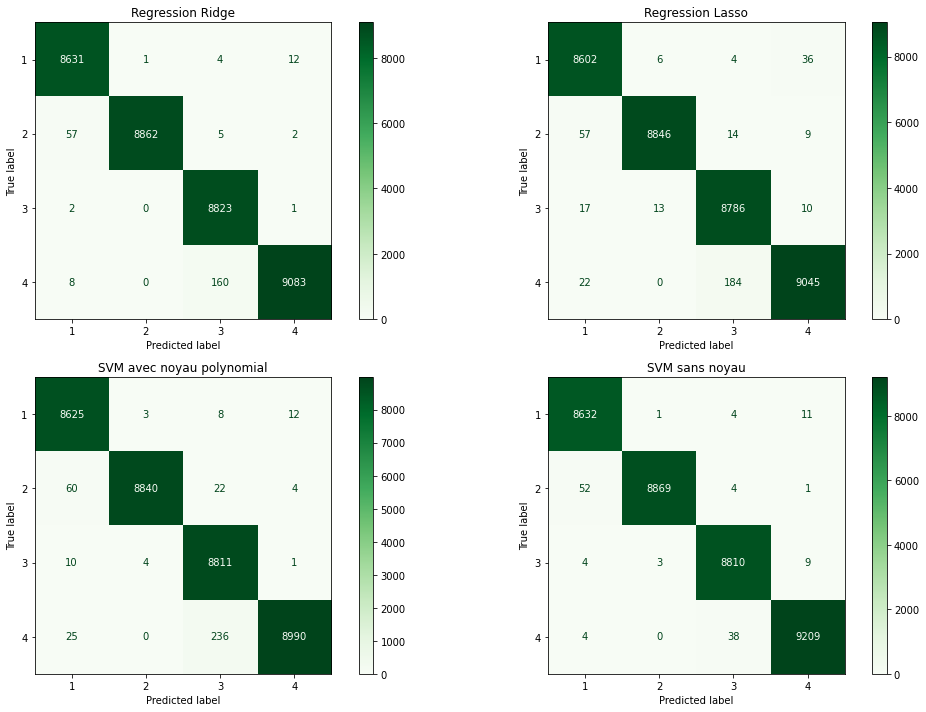

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers_ovr, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test_2, 
                          y_test_2, 
                          ax=ax, 
                          cmap='Greens')
axes[0,0].set_title("Regression Ridge")
axes[0,1].set_title("Regression Lasso")
axes[1,0].set_title("SVM avec noyau polynomial")
axes[1,1].set_title("SVM sans noyau")
plt.tight_layout()  
plt.show()

On trouve que pour la méthode classification OnevsAll, les résultats de 4 modèles utiliser sont pres que parfait. Parmi ces quartres modèles, je trouve que le modèles SVM sans noyau (kernel = lineaire) est le meilleur modèle par rapport les autres modèles. Tous les langues sont facile à classifier! 

### Méthode One vs One

OneVsOneClassifier construit un classificateur par paire de classes. Au moment de la prédiction, la classe qui a reçu le plus de votes est sélectionnée. En cas d'égalité (entre deux classes avec un nombre égal de voix), il sélectionne la classe avec la confiance de classification agrégée la plus élevée en additionnant les niveaux de confiance de classification par paire calculés par les classificateurs binaires sous-jacents. Puisqu'elle nécessite d'ajuster n_classes * (n_classes - 1) / 2 classificateurs, cette méthode est généralement plus lente que one-vs-the-rest, en raison de sa complexité O (n_classes ^ 2). La fonction de décision est le résultat d'une transformation monotone de la classification un contre un.



In [58]:
#Construire le modèle classifcation One vs One!

In [30]:
classifiers = [OneVsOneClassifier(Ridge(alpha=10)), 
               OneVsOneClassifier(Lasso(alpha=0.01)),
               OneVsOneClassifier(SVC(C = 0.01, kernel = 'poly', gamma=0.001)), 
               OneVsOneClassifier(SVC(C = 0.1, kernel = 'linear', gamma=0.1))]
for cls in classifiers:
    cls.fit(X_train_2, y_train_2)
    

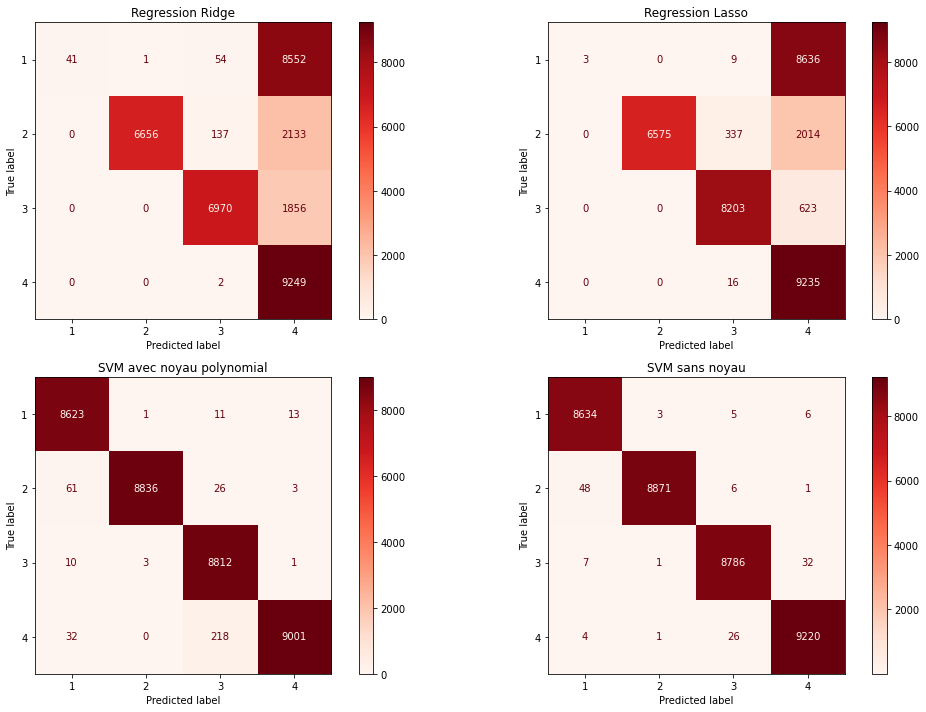

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test_2, 
                          y_test_2, 
                          ax=ax, 
                          cmap='Reds')
axes[0,0].set_title("Regression Ridge")
axes[0,1].set_title("Regression Lasso")
axes[1,0].set_title("SVM avec noyau polynomial")
axes[1,1].set_title("SVM sans noyau")
plt.tight_layout()  
plt.show()

On trouve que pour la méthode one vs one, les modèles SVM donne les résultats plus performance par rapport les modèles Ridge et Lasso. 
Par ailleurs, dans les quatres langues je trouve que la langue Espagne est plus facile à classer, et la langue Francais est plus diffcile pour détecter (en comparant One vs One)!